# A4: Common Analysis
## Essex County, New Jersey
#### Aaliyah Hänni
#### 10/30/2021

Research Question: 
How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 15, 2021?


In this step we want you to create a graph that visualizes how the course of the disease was changed by masking policies. For your county:

* create a time series showing the changes in the derivative function of the rate of infection
* indicate days where masking policies were in effect (or not) 
* whether the difference in the derivative function was significant
* Optionally, you can add a second time series that shows the actual rate of infection.


Data Sources:
1. The RAW_us_confirmed_cases.csv file from the Kaggle repository of John Hopkins University COVID-19 data.
https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university
2. The CDC dataset of masking mandates by county.
https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Public-Mask-Mandates-Fro/62d6-pm5i
3. The New York Times mask compliance survey data.
https://github.com/nytimes/covid-19-data/tree/master/mask-use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
total_pop = 863728

## Importing data

In [3]:
cases = pd.read_csv('RAW_us_confirmed_cases.csv')
cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,9910,9954,9967,10043,10047,10048,10061,10083,10219,10228
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37167,37192,37224,37245,37258,37266,37285,37325,37350,37372
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3565,3566,3575,3577,3578,3578,3583,3595,3596,3596
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4236,4240,4246,4251,4252,4253,4256,4262,4275,4276
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10132,10162,10179,10192,10197,10207,10227,10338,10364,10371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5098,5110,5119,5119,5119,5152,5164,5168,5185,5204
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3744,3756,3781,3781,3781,3794,3805,3814,3817,3829
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1645,1657,1677,1677,1677,1690,1700,1715,1719,1731


In [4]:
mask_use = pd.read_csv('mask-use-by-county.csv')
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [5]:
mask_mandate = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
mask_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


## Filtering dataset to Essex county

Essex county FIPS = 34013 (Source: https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey)

In [6]:
mask_use = mask_use[mask_use['COUNTYFP'] == 34013]

In [7]:
cases[cases['Province_State'] == 'New Jersey'] #index1850
cases = cases.iloc[1850]
cases = pd.DataFrame(cases).transpose()

In [8]:
mask_mandate = mask_mandate[mask_mandate['County_Name'] == 'Essex County']
mask_mandate = mask_mandate[mask_mandate['State_Tribe_Territory'] == 'NJ']

## Plotting Number of Cases

In [9]:
#daily_cases = cases.iloc[:, 11:] #gives only dates & cases

In [10]:
conf_cases = cases.iloc[:, 11:].transpose()

In [11]:
#daily_cases_vertical['date'] = daily_cases.columns.transpose()

In [12]:
conf_cases = conf_cases.reset_index()

In [13]:
conf_cases.columns = ['date', 'cases']

In [14]:
conf_cases['date'] = pd.to_datetime(conf_cases['date'])

In [15]:
conf_cases.dtypes

date     datetime64[ns]
cases            object
dtype: object

In [16]:
conf_cases

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
642,2021-10-25,105931
643,2021-10-26,106049
644,2021-10-27,106114
645,2021-10-28,106195


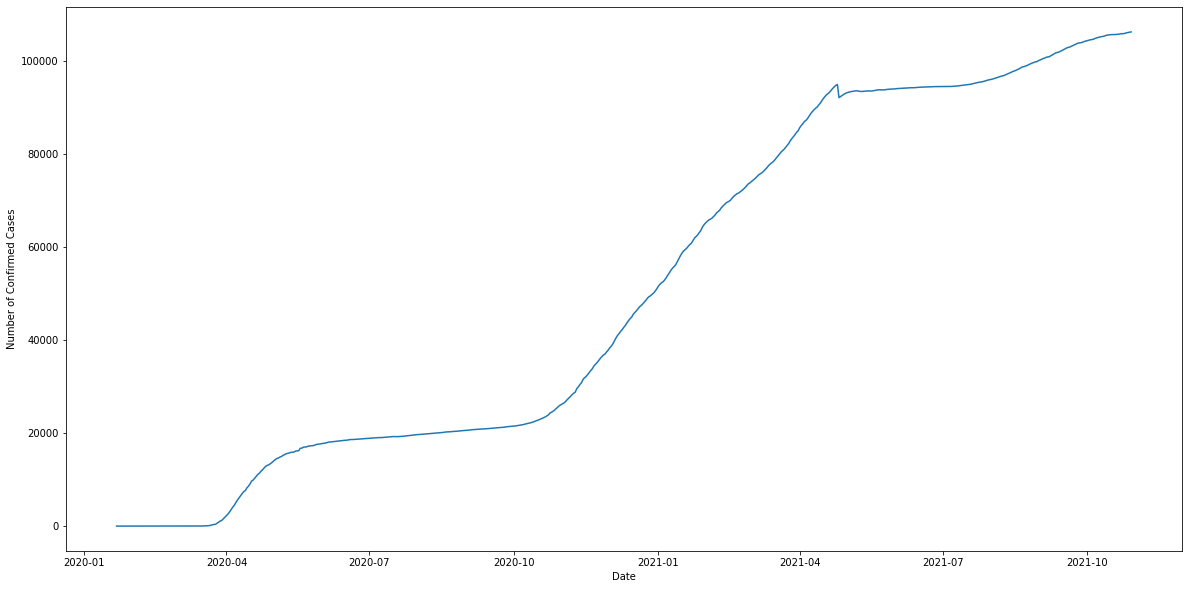

In [17]:
#confirmed cases

plt.rcParams["figure.figsize"] = (20,10) #resize plot

plt.plot(conf_cases['date'], conf_cases['cases'])

plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

plt.show()

In [18]:
#new daily case count
daily_cases = conf_cases
for i in range(len(conf_cases) - 1):
    daily_cases['cases'][i] = conf_cases['cases'][i + 1] - conf_cases['cases'][i]
    
daily_cases 

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
642,2021-10-25,118
643,2021-10-26,65
644,2021-10-27,81
645,2021-10-28,55


In [19]:
#need to fix indexing issue with the last 2 rows
daily_cases[-2:][cases] = []

TypeError: Must pass DataFrame or 2-d ndarray with boolean values only

In [ ]:
#daily cases

plt.rcParams["figure.figsize"] = (20,10) #resize plot

plt.plot(daily_cases[:-2]['date'], daily_cases[:-2]['cases'])

plt.xlabel('Date')
plt.ylabel('Number of New Daily Cases')

plt.show()